<h3>Upload Data</h3>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/trying"

In [ ]:
%cd /content/drive/MyDrive/trying
!ls -a

/content/drive/MyDrive/trying
 brain-tumor-classification-mri.zip
 kaggle.json
 model_drop_batch_weight_from_callback_InceptionV3.h5
 model_drop_batch_weight_from_callback_VGG19.h5
 Testing
 Training
'Tubes ML.ipynb'
'Tubes ML_V1-VGG16.ipynb'
'Tubes ML_V2-InceptionV3.ipynb'


In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

brain-tumor-classification-mri.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import os
import zipfile

local_zip = 'brain-tumor-classification-mri.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
%cd '/tmp/'
!ls -a

/tmp
.
..
dap_multiplexer.f9a19b6cd9a1.root.log.INFO.20211221-085626.46
dap_multiplexer.INFO
debugger_1z5iock878
directoryprefetcher_binary.f9a19b6cd9a1.root.log.INFO.20211221-085803.257
directoryprefetcher_binary.INFO
drivefs_ipc.0
drivefs_ipc.0_shell
initgoogle_syslog_dir.0
pyright-99-h7jxurKQPRZP
pyright-99-kUC3iLqIEh2p
python-languageserver-cancellation
Testing
tmpzjmi8kp0
Training


In [ ]:
train_dir = '/tmp/Training'
gli_train_dir = train_dir + '/glioma_tumor'
men_train_dir = train_dir + '/meningioma_tumor'
no_train_dir  = train_dir + '/no_tumor'
pit_train_dir = train_dir + '/pituitary_tumor'

test_dir = '/tmp/Testing'
gli_test_dir = test_dir + '/glioma_tumor'
men_test_dir = test_dir + '/meningioma_tumor'
no_test_dir  = test_dir + '/no_tumor'
pit_test_dir = test_dir + '/pituitary_tumor'

In [ ]:
print("Training")
print("Total Training Glioma Tumor     :", len(os.listdir(gli_train_dir)))
print("Total Training Meningioma Tumor :", len(os.listdir(men_train_dir)))
print("Total Training No Tumor         :", len(os.listdir(no_train_dir)))
print("Total Training Pituitary_Tumor  :", len(os.listdir(pit_train_dir)))
print("Testing")
print("Total Testing Glioma Tumor     :", len(os.listdir(gli_test_dir)))
print("Total Testing Meningioma Tumor :", len(os.listdir(men_test_dir)))
print("Total Testing No Tumor         :", len(os.listdir(no_test_dir)))
print("Total Testing Pituitary_Tumor  :", len(os.listdir(pit_test_dir)))

Training
Total Training Glioma Tumor     : 826
Total Training Meningioma Tumor : 822
Total Training No Tumor         : 395
Total Training Pituitary_Tumor  : 827
Testing
Total Testing Glioma Tumor     : 100
Total Testing Meningioma Tumor : 115
Total Testing No Tumor         : 105
Total Testing Pituitary_Tumor  : 74


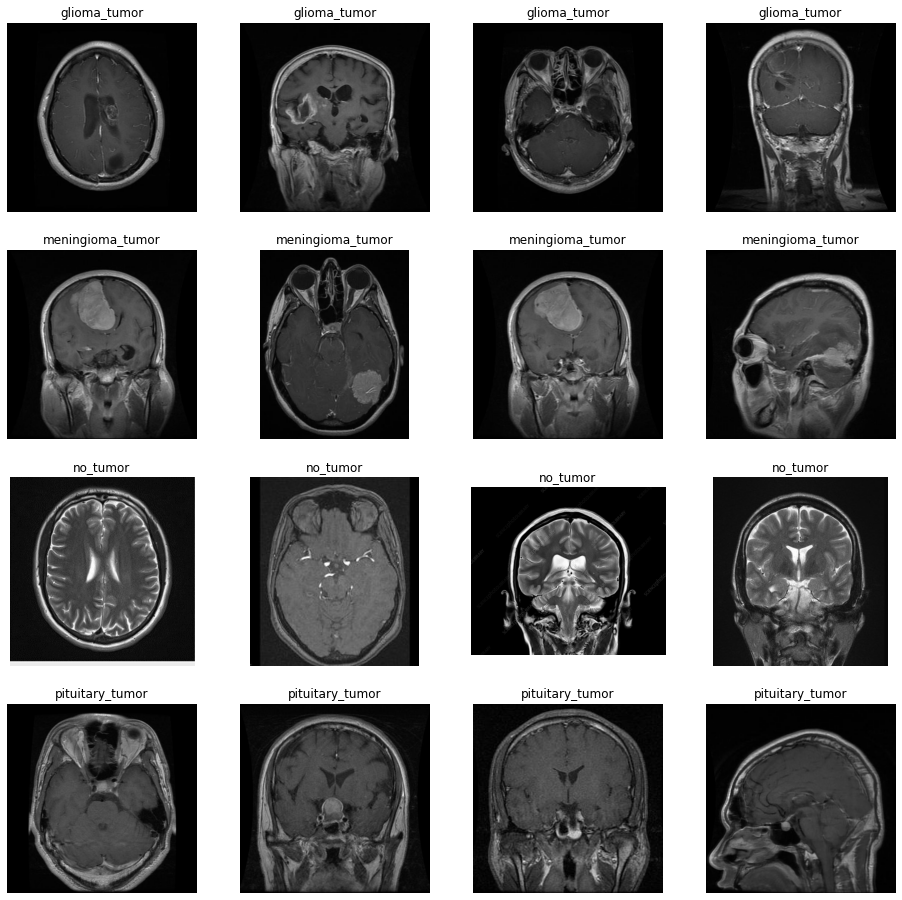

In [ ]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4,nrows * 4)

pic_index += 8
gli_img  = [os.path.join(gli_train_dir, fname) for fname in os.listdir(gli_train_dir)[:4]]
men_img  = [os.path.join(men_train_dir, fname) for fname in os.listdir(men_train_dir)[:4]]
no_img   = [os.path.join(no_train_dir, fname) for fname in os.listdir(no_train_dir)[:4]]
pit_img  = [os.path.join(pit_train_dir, fname) for fname in os.listdir(pit_train_dir)[:4]]

for i, img_path in enumerate(gli_img+men_img+no_img+pit_img):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model

import tensorflow as tf
from tensorflow.keras.applications.vgg19 import preprocess_input

In [ ]:
width=150; height=150
batch_size=32

In [ ]:
image_DataGenerator = ImageDataGenerator(preprocessing_function=preprocess_input,
                                         rotation_range=40,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True,
                                         fill_mode = 'reflect')

train_generator = image_DataGenerator.flow_from_directory(train_dir,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(height, width),
                                                    )                                            
val_generator = image_DataGenerator.flow_from_directory(test_dir,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(height, width)
                                                    )

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='auto')        
directory_to_save_best_model_file = '/content/drive/MyDrive/trying/model_drop_batch_weight_from_callback_VGG19.h5'
best_model = ModelCheckpoint(directory_to_save_best_model_file, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [ ]:
# import pretrain model in this case i use Resnet Model and setting the parameter "include_top" to false so i can change it
VGG19_base = tf.keras.applications.vgg19.VGG19(include_top=False, 
                                               weights='imagenet',
                                               input_tensor=None, 
                                               input_shape=(height, width,3))

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
# i add some of layer and setting dropout more big to avoid Overffiting in my model
print('Adding new layers')
output = VGG19_base.get_layer(index = -1).output  
output = Flatten()(output)
output = Dense(1024,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.6)(output)
output = Dense(1024,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
output = Dense(4, activation='softmax')(output) 
print('New layers Finishing Added!!!!')

Adding new layers
New layers Finishing Added!!!!


In [ ]:
# let's loojk to the arcitecture of the model that build
VGG19_model = Model(VGG19_base.input, output)
for layer in VGG19_model.layers[:-7]:
    layer.trainable = False

VGG19_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
# compile the model and set loss parameter to "catagorical_crossentropy" because we have more of 2 class to clasify

VGG19_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', 
                        metrics =['accuracy'])

In [ ]:
# lets train model and set some of parameter like a epoch , in this case i set the epoch in 30 because i thing is more enough
history = VGG19_model.fit_generator(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=val_generator,
                              callbacks = [callbacks, best_model]
                              )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
90/90 [==============================] - ETA: 0s - loss: 1.6054 - accuracy: 0.4676
Epoch 00001: val_accuracy improved from -inf to 0.38579, saving model to /content/drive/MyDrive/trying/model_drop_batch_weight_from_callback_VGG19.h5
90/90 [==============================] - 867s 10s/step - loss: 1.6054 - accuracy: 0.4676 - val_loss: 3.3630 - val_accuracy: 0.3858
Epoch 2/50
90/90 [==============================] - ETA: 0s - loss: 1.1883 - accuracy: 0.6136
Epoch 00002: val_accuracy improved from 0.38579 to 0.44162, saving model to /content/drive/MyDrive/trying/model_drop_batch_weight_from_callback_VGG19.h5
90/90 [==============================] - 816s 9s/step - loss: 1.1883 - accuracy: 0.6136 - val_loss: 2.2315 - val_accuracy: 0.4416
Epoch 3/50
90/90 [==============================] - ETA: 0s - loss: 1.0451 - accuracy: 0.6711
Epoch 00003: val_accuracy improved from 0.44162 to 0.51777, saving model to /content/drive/MyDrive/trying/model_drop_batch_weight_from_callback_VGG19.h5
9

In [ ]:
from keras.models import Sequential, load_model
target_dir = '/content/drive/MyDrive/trying/model_drop_batch_weight_from_callback_VGG19.h5'

best_model_scd = load_model(target_dir)

In [ ]:
def pred_img(img_path):
    img = load_img(img_path, target_size=(150,150))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)

    start_pred_time = time.time()

    pred_result = best_model_scd.predict(img) #define predict

    end_pred_time = time.time()

    pred_value = np.argmax(pred_result[0])
    # pred_label = list(label_dict.keys())[list(label_dict.values()).index(pred_value)]
    pred_label = 'glioma_tumor' if pred_value == 0 else 'meningioma_tumor' if pred_value == 1 else 'no_tumor' if pred_value == 2 else 'pituitary_tumor'
    confidence_percent = np.max(pred_result[0]) * 100
    pred_time = end_pred_time - start_pred_time

    return pred_label, confidence_percent, pred_time

In [ ]:
gli_img  = [os.path.join(gli_train_dir, fname) for fname in os.listdir(gli_train_dir)[:4]]
men_img  = [os.path.join(men_train_dir, fname) for fname in os.listdir(men_train_dir)[:4]]
no_img   = [os.path.join(no_train_dir, fname) for fname in os.listdir(no_train_dir)[:4]]
pit_img  = [os.path.join(pit_train_dir, fname) for fname in os.listdir(pit_train_dir)[:4]]

tumor = gli_img + men_img + no_img + pit_img

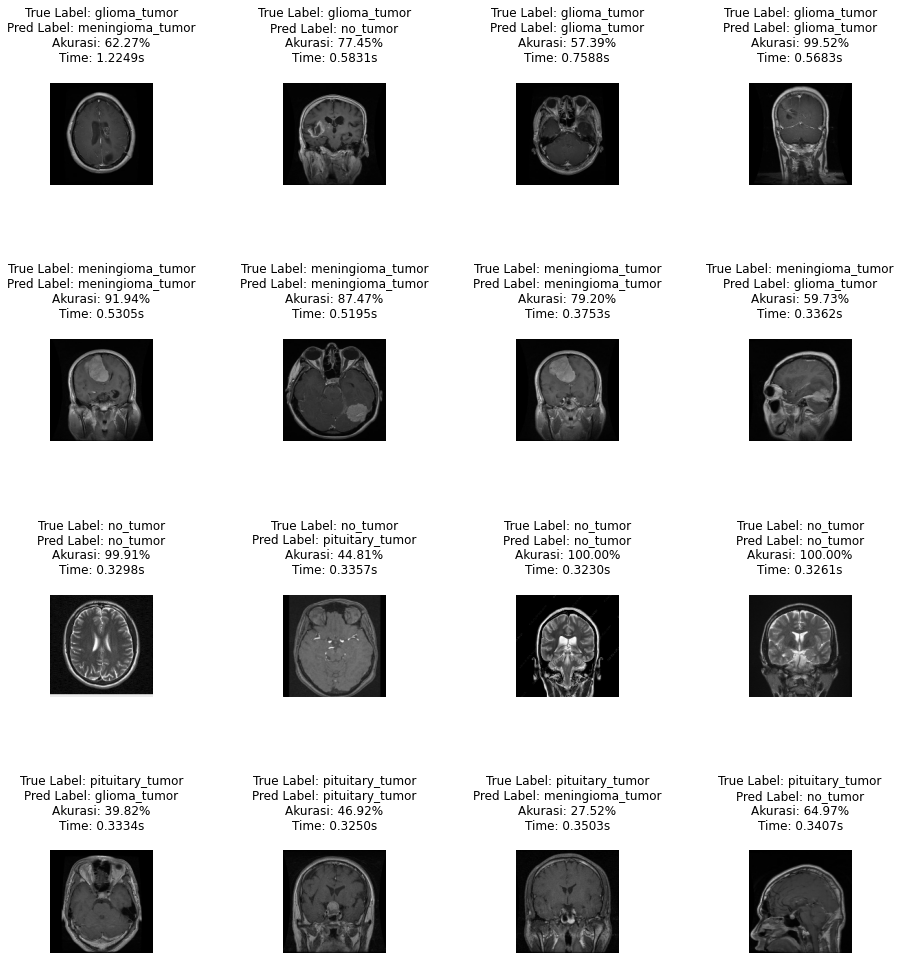

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import time

nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(tumor):
    plt.subplot(nrows, ncols, i + 1)
    plt.subplots_adjust(hspace=1.5)

    img = cv2.imread(img_path)
    img = cv2.resize(img, (150,150))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    true_label = img_path.split(os.path.sep)[-2]
    pred_result = pred_img(img_path)
    pred_label = pred_result[0]
    confidence_percent = pred_result[1]
    pred_time = pred_result[2]

    plt.title(f"True Label: {true_label}\nPred Label: {pred_label}\nAkurasi: {confidence_percent:.2f}%\nTime: {pred_time:.4f}s", y=1.15)
    plt.grid(False)
    plt.axis(False)
    plt.imshow(img)

plt.show()